In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install math
!pip install scipy

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt

# Reading the Data : 

In [17]:
ev_data = pd.read_csv('Datasets\Electric_Vehicle_Population_Data.csv')
print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [33]:
columns_list = list(ev_data.columns)
columns_list

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Postal Code',
 'Model Year',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 'Vehicle Location',
 'Electric Utility',
 '2020 Census Tract']

# Cleaning the Data : 

In [18]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [25]:
ev_data.isnull()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [16]:
ev_data_new = ev_data.dropna()

In [23]:
print(ev_data_new.info())


<class 'pandas.core.frame.DataFrame'>
Index: 177473 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177473 non-null  object 
 1   County                                             177473 non-null  object 
 2   City                                               177473 non-null  object 
 3   State                                              177473 non-null  object 
 4   Postal Code                                        177473 non-null  float64
 5   Model Year                                         177473 non-null  int64  
 6   Make                                               177473 non-null  object 
 7   Model                                              177473 non-null  object 
 8   Electric Vehicle Type                              177473 non-null  object 
 9 

In [24]:
ev_data_new.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Data Analysis : 

In [36]:
ev_data_new['Model Year']

0         2020
1         2023
2         2019
3         2016
4         2021
          ... 
177861    2022
177862    2023
177863    2021
177864    2021
177865    2021
Name: Model Year, Length: 177473, dtype: int64

In [35]:
ev_data_new['Model Year'].value_counts()  #Return a Series containing counts of unique values. 
# The resulting object will be in descending order so that the first element is the most frequently-occurring element

Model Year
2023    57519
2022    27708
2021    19063
2018    14286
2020    11740
2019    10913
2017     8534
2024     7072
2016     5469
2015     4826
2013     4399
2014     3496
2012     1614
2011      775
2010       23
2008       19
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

In [38]:
ev_data_new['Model Year'].value_counts().sort_index() #sorts in ascending order

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

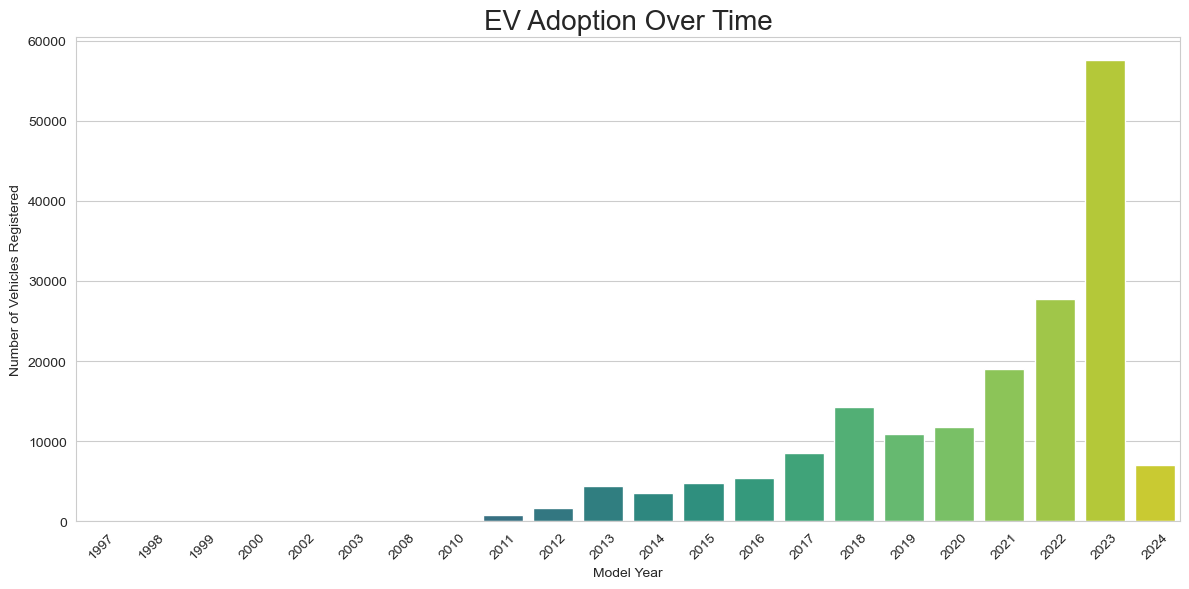

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data_new['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time',fontsize=20)
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## The bar chart clearly shows that electric vehicle (EV) adoption has been growing over time, with a significant acceleration starting around 2016. Prior to this period, the growth in the number of registered vehicles was gradual. From 2017 onward, the rate of increase accelerated, culminating in a particularly sharp rise in 2023, where the bar for that year is the highest, indicating a peak in EV adoption.


## Let's turn our attention to the popularity of electric vehicle manufacturers and models among registered vehicles. This analysis will allow us to pinpoint which manufacturers and specific models lead the EV market, shedding light on consumer preferences, brand loyalty, and the effectiveness of various manufacturers' strategies in advancing electric mobility. Now, let's explore the top manufacturers and then delve into the most popular models within each brand.

In [53]:
ev_data_new['Make'].value_counts()

Make
TESLA                   79471
NISSAN                  13984
CHEVROLET               13651
FORD                     9177
BMW                      7556
KIA                      7423
TOYOTA                   6254
VOLKSWAGEN               4993
JEEP                     4468
HYUNDAI                  4398
RIVIAN                   4307
VOLVO                    4124
AUDI                     3637
CHRYSLER                 2976
MERCEDES-BENZ            1588
PORSCHE                  1137
MITSUBISHI                957
MINI                      898
POLESTAR                  881
HONDA                     831
SUBARU                    830
FIAT                      784
DODGE                     568
MAZDA                     476
CADILLAC                  380
LEXUS                     370
SMART                     270
LINCOLN                   266
LUCID                     240
JAGUAR                    232
GENESIS                   181
LAND ROVER                 55
FISKER                     48
ALFA 

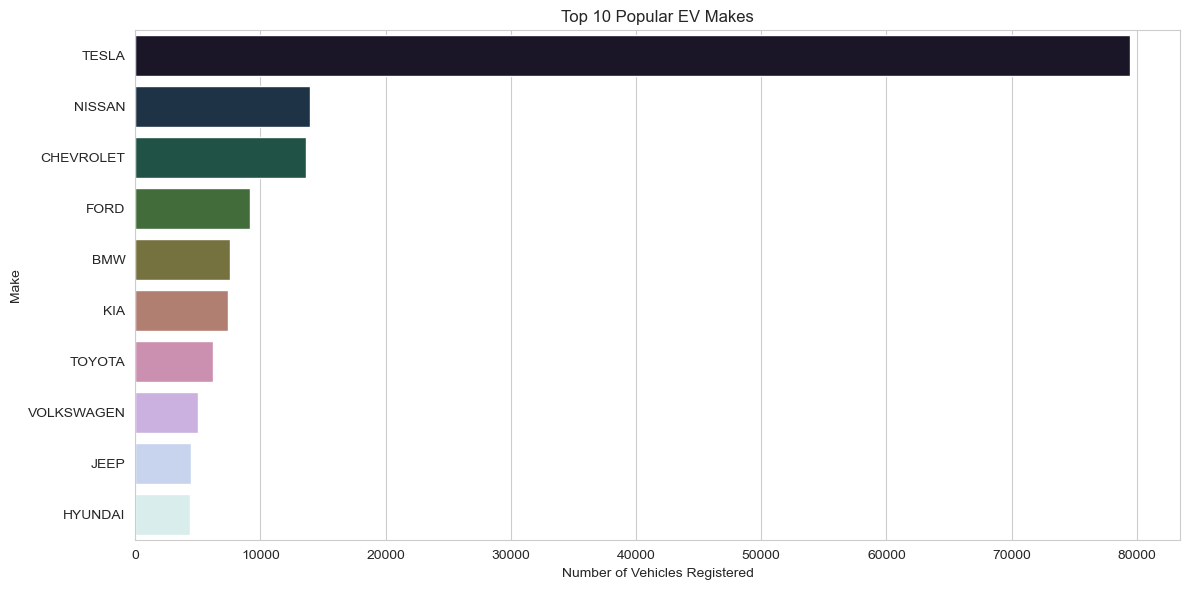

In [58]:
ev_maker_distribution = ev_data_new['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_maker_distribution.values, y=ev_maker_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [70]:
top_3_makes = ev_maker_distribution.head(3).index
top_3_makes

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')

In [71]:
top_makes_data = ev_data_new[ev_data_new['Make'].isin(top_3_makes)]
top_makes_data


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177860,1G1FX6S00J,Clallam,Sequim,WA,98382.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,24.0,347972607,POINT (-123.105015 48.08125),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [77]:
top_makes_data.groupby(['Make', 'Model']).size()


Make       Model       
CHEVROLET  BLAZER EV          14
           BOLT EUV         1770
           BOLT EV          6811
           S-10 PICKUP         1
           SILVERADO EV       33
           SPARK             240
           VOLT             4782
NISSAN     ARIYA             632
           LEAF            13352
TESLA      MODEL 3         30009
           MODEL S          7711
           MODEL X          5784
           MODEL Y         35921
           ROADSTER           46
dtype: int64

In [78]:
top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False)

Make       Model       
TESLA      MODEL Y         35921
           MODEL 3         30009
NISSAN     LEAF            13352
TESLA      MODEL S          7711
CHEVROLET  BOLT EV          6811
TESLA      MODEL X          5784
CHEVROLET  VOLT             4782
           BOLT EUV         1770
NISSAN     ARIYA             632
CHEVROLET  SPARK             240
TESLA      ROADSTER           46
CHEVROLET  SILVERADO EV       33
           BLAZER EV          14
           S-10 PICKUP         1
dtype: int64

In [79]:
top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


In [72]:
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
ev_model_distribution_top_makes

,Make,Model,Number of Vehicles
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6811
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


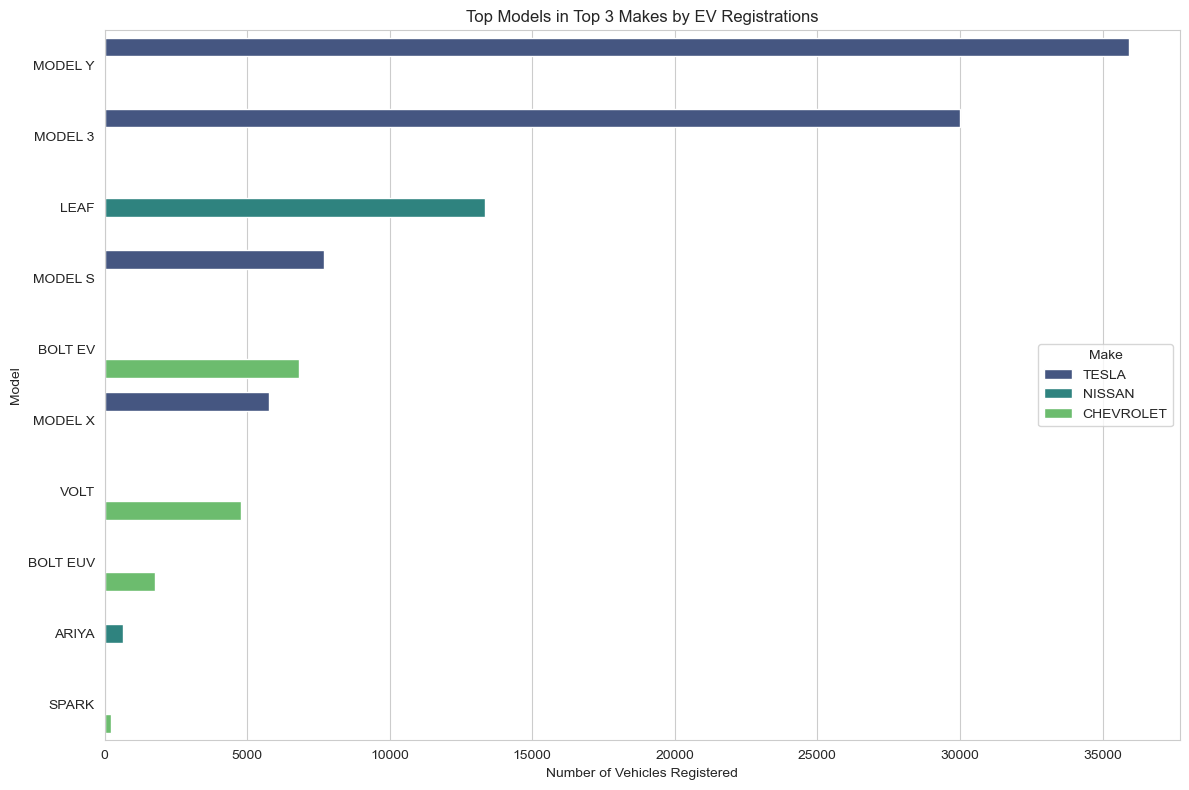

In [61]:
top_3_makes = ev_maker_distribution.head(3).index
top_makes_data = ev_data_new[ev_data_new['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models = ev_model_distribution_top_makes.head(10)



plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

C:\Users\DefaultAppPool\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


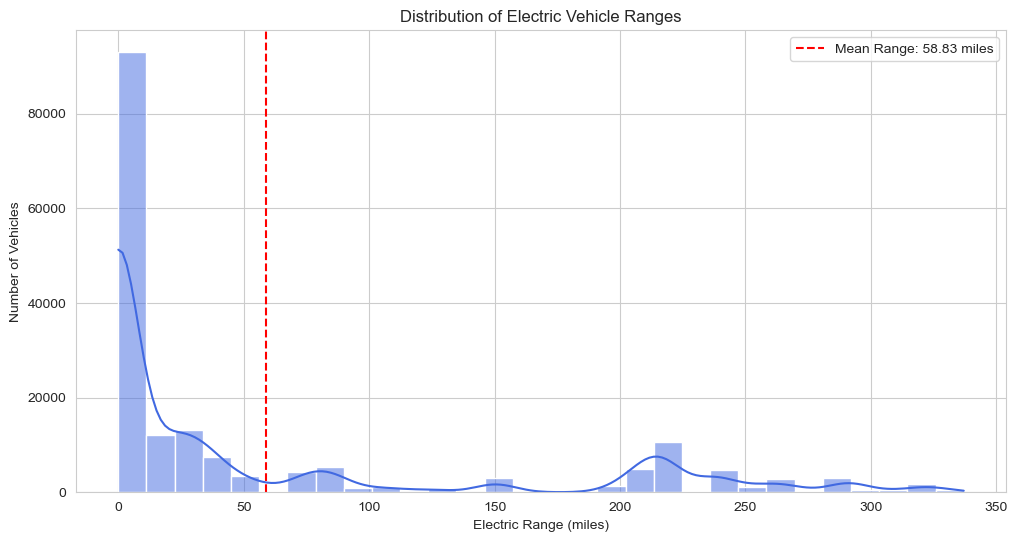

In [85]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_data_new['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data_new['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data_new["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

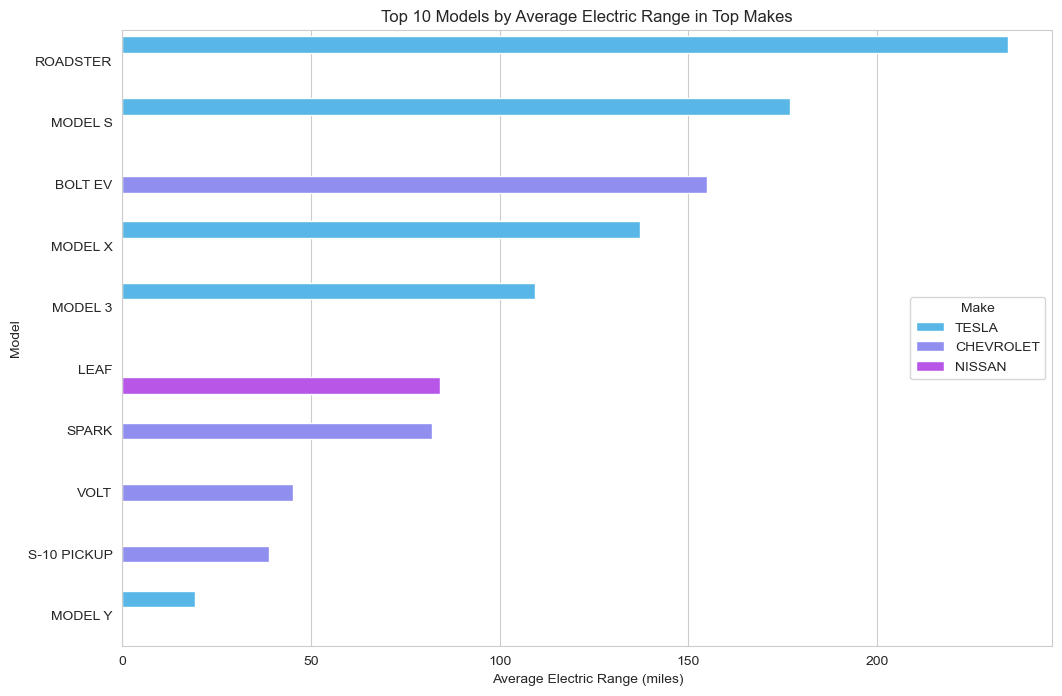

In [95]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

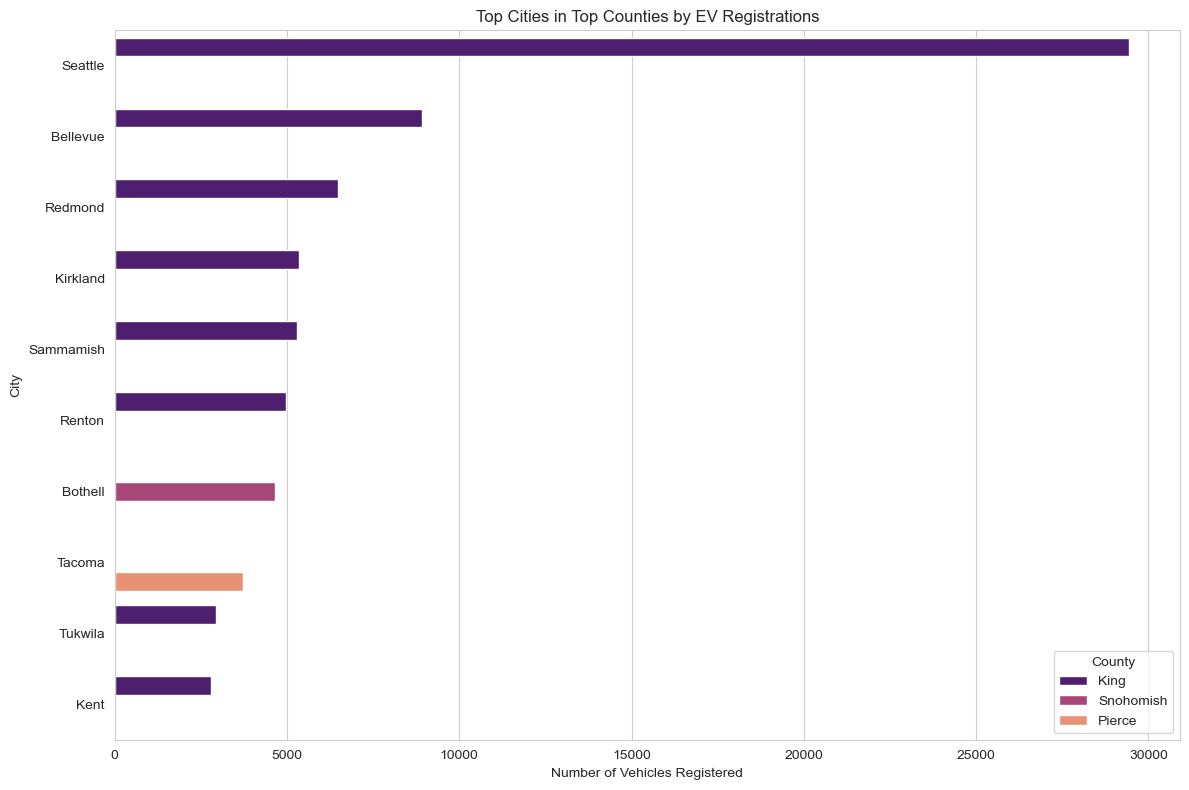

In [47]:
# geographical distribution at county level
ev_county_distribution = ev_data_new['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data_new[ev_data_new['County'].isin(top_counties)]

# axnalyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County',loc='lower right')
plt.tight_layout()
plt.show()

# Estimating future market :


In [96]:
from scipy.optimize import curve_fit
import numpy as np

ev_registration_counts = ev_data_new['Model Year'].value_counts().sort_index()
# ev_registration_counts

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


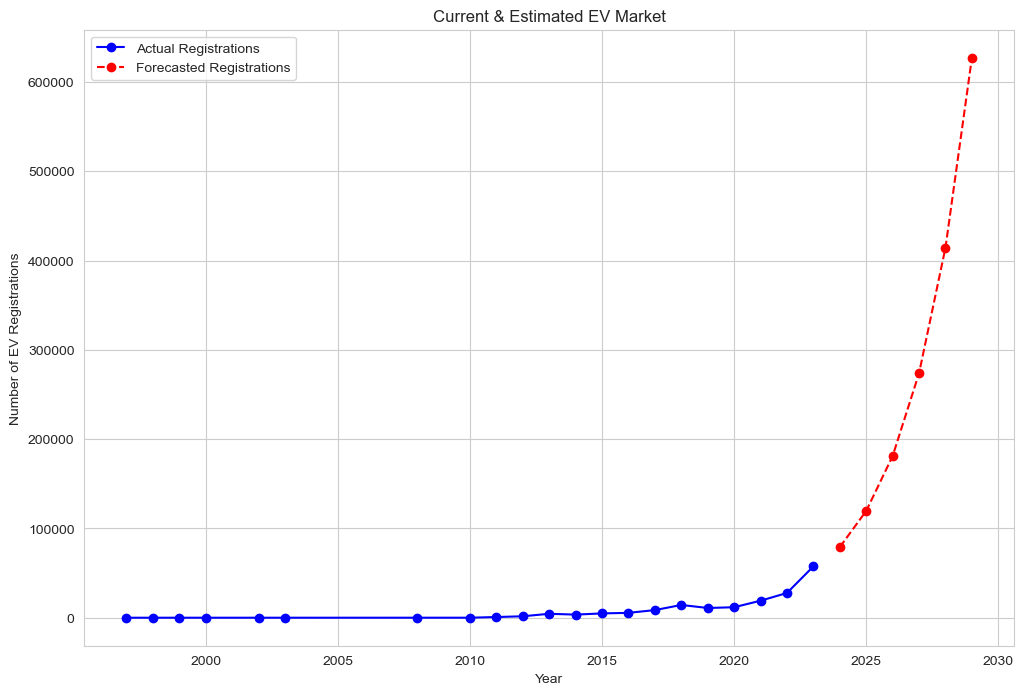

In [97]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()